## Задача 1.  
_Оценить месячный retention в оформление заказа с помощью когортного анализа_

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

**Загрузка и ознакомление с данными** 

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
#предварительный просмотр данных и понимание структуры
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [9]:
# Создаем копию данных, чтобы избежать изменений в исходных DataFrame
orders_copy = orders.copy()
customers_copy = customers.copy()
items_copy = items.copy()

In [10]:
# объединяем данные, чтобы использовать уникальный идентификатор пользователя 
orders_merge = orders_copy.merge(
    customers_copy[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
).copy()

In [11]:
#переводим в формат даты 
orders_merge['order_purchase_timestamp'] = pd.to_datetime(orders_merge['order_purchase_timestamp'])

In [12]:
#выбираем только доставленные заказы 
orders_merge = orders_merge[orders_merge['order_status']  == 'delivered']

In [13]:
# Извлекаем месяц и день заказа
orders_merge['order_period'] = orders_merge['order_purchase_timestamp'].dt.to_period('M')

In [14]:
orders_merge['order_period_day'] = orders_merge['order_purchase_timestamp'].dt.to_period('D').copy()

In [15]:
#Оставляем только необходимые столбцы 
orders_merge = orders_merge[['order_id','customer_id','customer_unique_id','order_status','order_purchase_timestamp','order_period','order_period_day']]

In [16]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
orders_merge['cohort'] = orders_merge.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M').copy()


In [17]:
orders_merge['cohort_day'] = orders_merge.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D').copy()

In [18]:
orders_merge

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_period,order_period_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03,2017-03-09,2017-03,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08


In [19]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
orders_merge['period_number_month'] = np.floor((orders_merge.order_period_day - orders_merge.cohort_day).apply(attrgetter('n')) / 30)

In [20]:
orders_merge

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_period,order_period_day,cohort,cohort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13,0.0
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,delivered,2017-03-09 09:54:05,2017-03,2017-03-09,2017-03,2017-03-09,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,delivered,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,delivered,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,delivered,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08,0.0


In [21]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = orders_merge.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [22]:
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,5949
213,2018-07,1.0,6


In [23]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [24]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [26]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [27]:
# убираем первый столбец
retention_pivot_no_first = retention_matrix.iloc[:, 1:]  

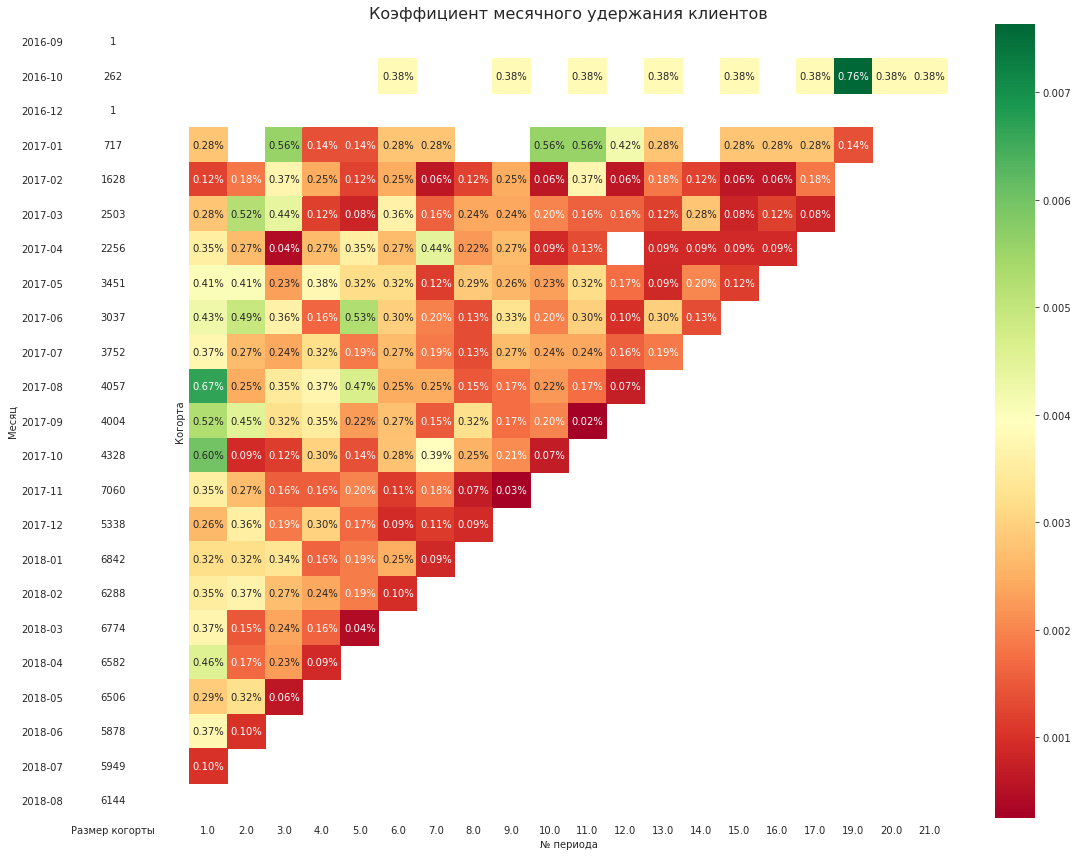

In [28]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_pivot_no_first,
                mask=retention_pivot_no_first.isnull(),
                annot=True,
                fmt='.2%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Коэффициент месячного удержания клиентов', fontsize=16)
    ax[1].set (xlabel='№ периода',ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'Размер когорты'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])
    ax[0].set (ylabel='Месяц')

    fig.tight_layout()
    plt.show()

In [29]:
#смотрим,чему равен медианный retention 1-го месяца (=0,35%) и когорту с самым высоким retention на 3-й месяц (=0,56%)

retention_matrix.describe()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
count,23.0,19.000000,17.000000,17.000000,16.000000,15.000000,15.000000,13.000000,11.000000,11.000000,...,10.000000,7.000000,8.000000,5.000000,6.000000,4.000000,4.000000,2.000000,1.000000,1.000000
mean,1.0,0.003639,0.002927,0.002650,0.002350,0.002235,0.002509,0.002013,0.001846,0.002339,...,0.002653,0.001637,0.002029,0.001651,0.001678,0.001372,0.002312,0.004514,0.003817,0.003817
std,0.0,0.001388,0.001298,0.001337,0.000942,0.001369,0.000870,0.001140,0.000847,0.000917,...,0.001525,0.001209,0.001072,0.000763,0.001312,0.000975,0.001291,0.004412,NaN,NaN
min,1.0,0.001009,0.000924,0.000443,0.000912,0.000443,0.000937,0.000614,0.000708,0.000283,...,0.000250,0.000614,0.000869,0.000887,0.000614,0.000614,0.000799,0.001395,0.003817,0.003817
25%,1.0,0.002859,0.001843,0.001873,0.001595,0.001391,0.002461,0.001159,0.001273,0.001914,...,0.001630,0.000864,0.001121,0.001229,0.000821,0.000818,0.001582,0.002954,0.003817,0.003817
50%,1.0,0.003546,0.002691,0.002399,0.002421,0.001900,0.002665,0.001841,0.001479,0.002457,...,0.002681,0.001598,0.001854,0.001317,0.001023,0.001043,0.002316,0.004514,0.003817,0.003817
75%,1.0,0.004169,0.003658,0.003451,0.003052,0.002718,0.002876,0.002465,0.002469,0.002662,...,0.003561,0.001669,0.002833,0.002028,0.002382,0.001596,0.003046,0.006074,0.003817,0.003817
max,1.0,0.006655,0.005194,0.005579,0.003767,0.005268,0.003817,0.004433,0.003247,0.003817,...,0.005579,0.004184,0.003817,0.002797,0.003817,0.002789,0.003817,0.007634,0.003817,0.003817


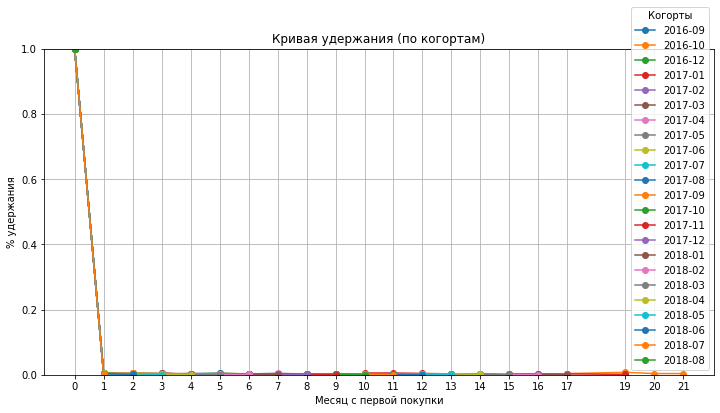

In [30]:
#  Строим кривую удержания
plt.figure(figsize=(12,6))
for cohort in retention_matrix.index:
    plt.plot(retention_matrix.columns, retention_matrix.loc[cohort], marker='o', label=str(cohort))

plt.title('Кривая удержания (по когортам)')
plt.xlabel('Месяц с первой покупки')
plt.ylabel('% удержания')
plt.xticks(retention_matrix.columns)
plt.ylim(0,1)
plt.legend(title='Когорты')
plt.grid(True)
plt.show()


## Задача 2.  
_Определить, существует ли product/market fit у маркетплейса._

Product/market fit отсутствует так как низкий уровень удержания клиентов. 
-
Медианный retention первого месяца: 0.35% (очень низкий показатель).

Максимальный retention на 3-й месяц: 0.56% (немного выше, но всё ещё крайне низкий).

После первой покупки клиенты практически не возвращаются.  



Масштабировать нельзя.

Для улучшения PMF необходимо: 

-Исследовать целевую аудиторию для понимания их потребностей и улучшения продукта. 

-На основании исследнивая оптимизировать ценностное предложение клиента. 

-Создать добавочную ценность в продукте, чтобы клиенты были готовы регулярно использовать продукт и платить за него. 

## Задача 3.
_Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании._

Продуктовые метрики 
-

1.Метрика роста объёма продаж маркетплейса (GMV (Gross Merchandise Value) - совокупная стоимость всех товаров, проданных через платформу за период, до вычета комиссий, возвратов и других расходов
-

In [191]:
# Объединяем данные orders_copy и  items_copy по order_id 
items_merge = orders_copy.merge(
    items_copy,
    on='order_id',
    how='inner'
)

In [192]:
# Преобразуем дату в правильный формат
items_merge['order_purchase_timestamp'] = pd.to_datetime(
    items_merge['order_purchase_timestamp']
)

In [193]:
#выбираем только доставленные заказы 
items_merge = items_merge[items_merge['order_status']  == 'delivered']

In [194]:
# Группируем данные по месяцам, считаем GMV 
GMV = items_merge.groupby(items_merge['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()

In [195]:
GMV 

order_purchase_timestamp
2016-09       134.97
2016-10     40325.11
2016-12        10.90
2017-01    111798.36
2017-02    234223.40
2017-03    359198.85
2017-04    340669.68
2017-05    489338.25
2017-06    421923.37
2017-07    481604.52
2017-08    554699.70
2017-09    607399.67
2017-10    648247.65
2017-11    987765.37
2017-12    726033.19
2018-01    924645.00
2018-02    826437.13
2018-03    953356.25
2018-04    973534.09
2018-05    977544.69
2018-06    856077.86
2018-07    867953.46
2018-08    838576.64
Freq: M, Name: price, dtype: float64

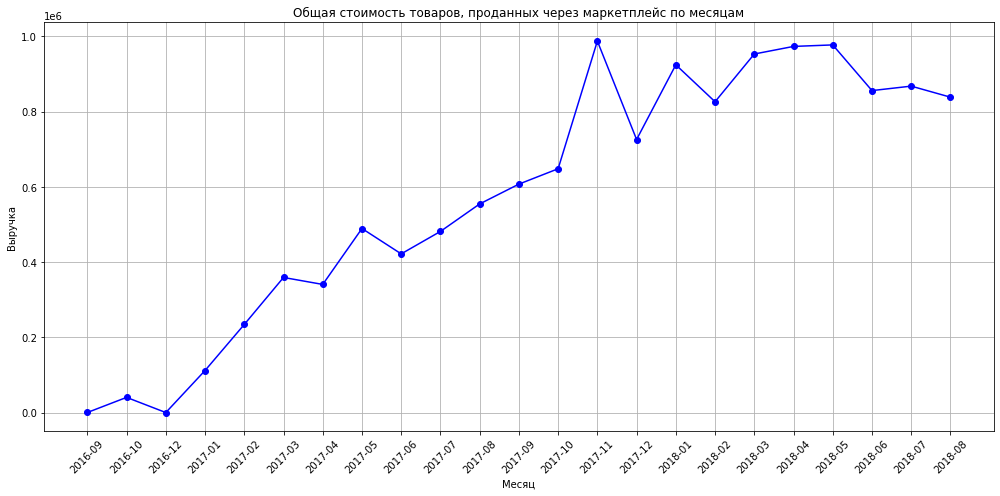

In [196]:
# Визуализация результатов
plt.figure(figsize=(14, 7))
plt.plot(
    GMV.index.astype(str),
    GMV .values,
    marker='o',
    linestyle='-',
    color='blue'
)
plt.title('Общая стоимость товаров, проданных через маркетплейс по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.Метрика объема аудитории, которой продукт доставляет ценность (MAU (Monthly Active Users) - показывает всего количество активных покупателей в месяц(кто совершил покупки))
-

In [197]:
monthly_active_users = orders_merge.groupby(
    orders_merge['order_purchase_timestamp'].dt.to_period('M')
)['customer_unique_id'].nunique()

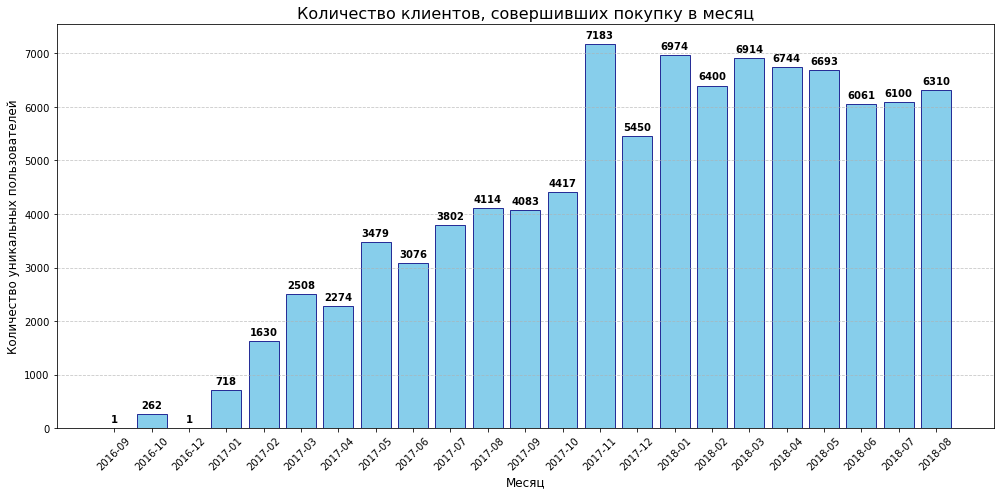

In [198]:
# Визуализация 
plt.figure(figsize=(14, 7))
bars = plt.bar(
    monthly_active_users.index.astype(str),
    monthly_active_users.values,
    color='skyblue',
    edgecolor='navy',
    linewidth=0.8
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height + max(monthly_active_users.values) * 0.01,  
        f'{int(height)}',  
        ha='center', 
        va='bottom',  
        fontsize=10,
        fontweight='bold'
    )

plt.title('Количество клиентов, совершивших покупку в месяц', fontsize=16)
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Количество уникальных пользователей', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.Метрика, которая отражает заинтересованность новых клиентов в продукте(NCC (New Customer Conversion) — конверсия новых пользователей в первую покупку
-
У нас нет данных о регистрации клиента, чтобы отследить конверсию нового пользователя в покупателя, а только данные о статусах заказов, в связи с чем мы не можем отследить конверсию нового клиента в покупателя и оценить заинтересованность новых клиентов в продукте.

Как альтернативу по имеющимся данным можно использовать First-time buyers share — доля покупателей, совершивших первый заказ в периоде.

In [199]:
# Находим первую покупку каждого клиента
first_purchase = orders_merge.groupby('customer_unique_id').agg(
    first_order_date=('order_purchase_timestamp', 'min')
).reset_index()

In [200]:
# Считаем новых покупателей (тех, кто сделал первую покупку)
new_buyers = first_purchase.shape[0]


In [201]:
# Группируем по месяцам
monthly_activation = orders_merge.merge(
    first_purchase[['customer_unique_id', 'first_order_date']],
    on='customer_unique_id'
).groupby(
    orders_merge['order_purchase_timestamp'].dt.to_period('M')
)['customer_unique_id'].nunique()


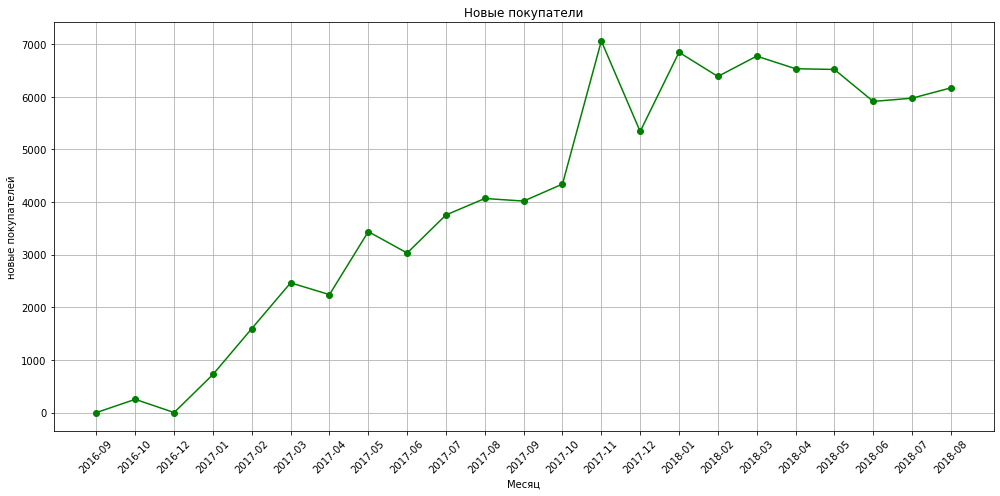

In [202]:
# Визуализация
plt.figure(figsize=(14, 7))
plt.plot(
    monthly_activation.index.astype(str), 
    monthly_activation.values, 
    marker='o', 
    linestyle='-', 
    color='green'
)
plt.title('Новые покупатели')
plt.xlabel('Месяц')
plt.ylabel('новые покупателей')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

4.Метрика, которая отражает вовлеченность клиента в продолжение использования продукта (Repeat Purchase Rate (RPR) - показывает процент возвращающихся клиентов, кто совершил повторные покупки) 
-

In [203]:
# Расчет количества покупок на клиента
customer_orders = orders_merge.groupby('customer_unique_id').size()

In [204]:
# Определение клиентов с повторными покупками
single_purchase = customer_orders[customer_orders == 1].count()
repeat_purchase = customer_orders[customer_orders > 1].count()
total_customers = customer_orders.count()


print(f"Клиенты с одной покупкой: {single_purchase}")
print(f"Клиенты с повторными покупками: {repeat_purchase}")
print(f"Общее количество покупателей: {total_customers}")

Клиенты с одной покупкой: 90557
Клиенты с повторными покупками: 2801
Общее количество покупателей: 93358


In [205]:
# Расчет RPR
rpr = ((repeat_purchase / total_customers) * 100).round(1)

print(f"Repeat Purchase Rate = {rpr}")

Repeat Purchase Rate = 3.0


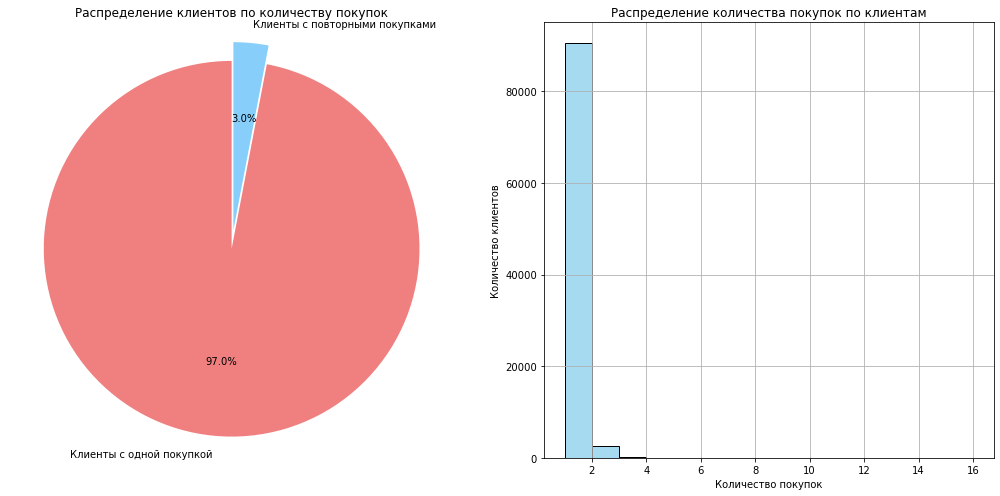

Общее количество клиентов: 93358
Клиенты с одной покупкой: 90557
Клиенты с повторными покупками: 2801
Repeat Purchase Rate: 3.00%


In [206]:
# Визуализация
plt.figure(figsize=(14, 7))

# Круговая диаграмма
plt.subplot(1, 2, 1)
labels = ['Клиенты с одной покупкой', 'Клиенты с повторными покупками']
sizes = [single_purchase, repeat_purchase]
colors = ['lightcoral', 'lightskyblue']
explode = [0.1, 0]  # выделение первого сектора

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Распределение клиентов по количеству покупок')
plt.axis('equal')  # равные оси

# Гистограмма распределения покупок
plt.subplot(1, 2, 2)
sns.histplot(customer_orders, bins=range(1, customer_orders.max()+2), kde=False, color='skyblue')
plt.title('Распределение количества покупок по клиентам')
plt.xlabel('Количество покупок')
plt.ylabel('Количество клиентов')
plt.grid(True)

plt.tight_layout()
plt.show()

# Вывод результатов
print(f"Общее количество клиентов: {total_customers}")
print(f"Клиенты с одной покупкой: {single_purchase}")
print(f"Клиенты с повторными покупками: {repeat_purchase}")
print(f"Repeat Purchase Rate: {rpr:.2f}%")

5.Метрика, которая отражает денежное выражение вовлеченности клиента ( Lifetime Value LTV - выручка от клиента за весь период взаимодействия) 
-

In [207]:
# Объединение таблиц
df = pd.merge(orders_copy, items_copy, on='order_id', how='inner')
df_merge = pd.merge(df, customers_copy, on='customer_id', how='inner')

In [208]:
#выбираем только доставленные заказы 
df_merge = df_merge[df_merge['order_status']  == 'delivered']

In [209]:
#  Преобразование дат
df_merge['order_purchase_timestamp'] = pd.to_datetime(df_merge['order_purchase_timestamp'])
df_merge['purchase_date'] = df_merge['order_purchase_timestamp'].dt.date

In [210]:
# Извлекаем период (месяц и день)
df_merge['order_period'] = df_merge['order_purchase_timestamp'].dt.to_period('M')
df_merge['order_period_day'] = df_merge['order_purchase_timestamp'].dt.date  

In [211]:
# Присваиваем когорту (месяц первой покупки клиента)
df_merge['cohort'] = df_merge.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')

In [212]:
# Дата первой покупки клиента (в формате date)
df_merge['cohort_day'] = df_merge.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.date

In [213]:
# Рассчитываем номер периода в месяцах (разница в днях, делённая на 30)
df_merge['days_diff'] = (df_merge['order_period_day'] - df_merge['cohort_day']).dt.days
df_merge['period_number_month'] = np.floor(df_merge['days_diff'] / 30).astype(int)

In [214]:
df_merge

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,purchase_date,order_period,order_period_day,cohort,cohort_day,days_diff,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,2017-10-02,2017-10,2017-10-02,2017-09,2017-09-04,28,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,2018-07-24,2018-07,2018-07-24,2018-07,2018-07-24,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,2018-08-08,2018-08,2018-08-08,2018-08,2018-08-08,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,2017-11-18,2017-11,2017-11-18,2017-11,2017-11-18,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,9195,santo andre,SP,2018-02-13,2018-02,2018-02-13,2018-02,2018-02-13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,...,11722,praia grande,SP,2018-02-06,2018-02,2018-02-06,2018-02,2018-02-06,0,0
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,...,45920,nova vicosa,BA,2017-08-27,2017-08,2017-08-27,2017-08,2017-08-27,0,0
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,japuiba,RJ,2018-01-08,2018-01,2018-01-08,2018-01,2018-01-08,0,0
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,...,28685,japuiba,RJ,2018-01-08,2018-01,2018-01-08,2018-01,2018-01-08,0,0


In [215]:
# Создаём pivot-таблицу LTV
ltv = df_merge.pivot_table(
index='cohort',
columns='period_number_month',
values='price',
aggfunc='sum'
).cumsum(axis=1).fillna(0)

In [216]:
ltv

period_number_month,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,21
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,134.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2016-10,40325.11,0.00,0.00,0.00,0.00,0.00,40425.10,0.00,0.00,40764.10,...,40813.10,0.00,40928.30,0.00,41226.90,0.00,41324.90,41614.18,41746.58,41772.57
2016-12,21.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2017-01,111863.58,111946.47,0.00,112221.17,112281.16,112377.16,112654.11,112759.81,0.00,0.00,...,113553.06,113886.95,113984.85,0.00,114179.75,114273.65,114558.44,114596.44,0.00,0.00
2017-02,234582.18,234721.88,235066.68,235734.78,236154.14,236623.94,236822.92,237002.92,237435.72,238011.38,...,238562.16,238670.16,238949.96,239093.76,239210.76,239462.56,239788.46,0.00,0.00,0.00
2017-03,359408.62,360282.21,363026.23,363990.04,364488.93,365446.93,366380.39,367156.09,368092.98,368355.55,...,369346.78,369889.18,370137.97,370856.77,371254.47,371519.36,371645.15,0.00,0.00,0.00
2017-04,340790.01,341778.45,342747.62,342807.52,343702.59,345182.89,346683.86,348279.59,348698.39,349269.77,...,349880.35,0.00,350205.25,350526.90,351321.80,351496.79,0.00,0.00,0.00,0.00
2017-05,485839.78,486908.03,489406.99,490593.38,492061.36,494296.51,495700.69,495999.49,497377.53,498728.50,...,500972.10,501424.79,501531.58,502286.32,502508.72,0.00,0.00,0.00,0.00,0.00
2017-06,417400.60,419043.12,421270.92,422101.71,422982.17,424927.26,425766.42,426379.99,426627.86,428277.24,...,430978.19,431150.91,432884.98,434368.18,0.00,0.00,0.00,0.00,0.00,0.00


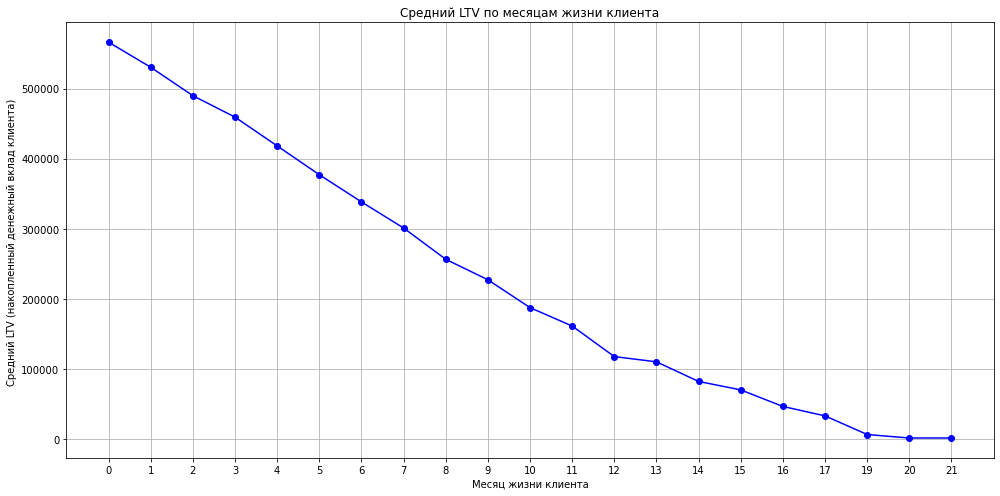

In [217]:
# Визуализация
avg_ltv = ltv.mean(axis=0)

plt.figure(figsize=(14, 7))
plt.plot(
    avg_ltv.index.astype(str), 
    avg_ltv.values, 
    marker='o',
    linestyle='-',
    color='blue'
    
)
plt.xlabel("Месяц жизни клиента")
plt.ylabel("Средний LTV (накопленный денежный вклад клиента) ")
plt.title("Средний LTV по месяцам жизни клиента")
plt.grid(True)
plt.tight_layout()
plt.show()

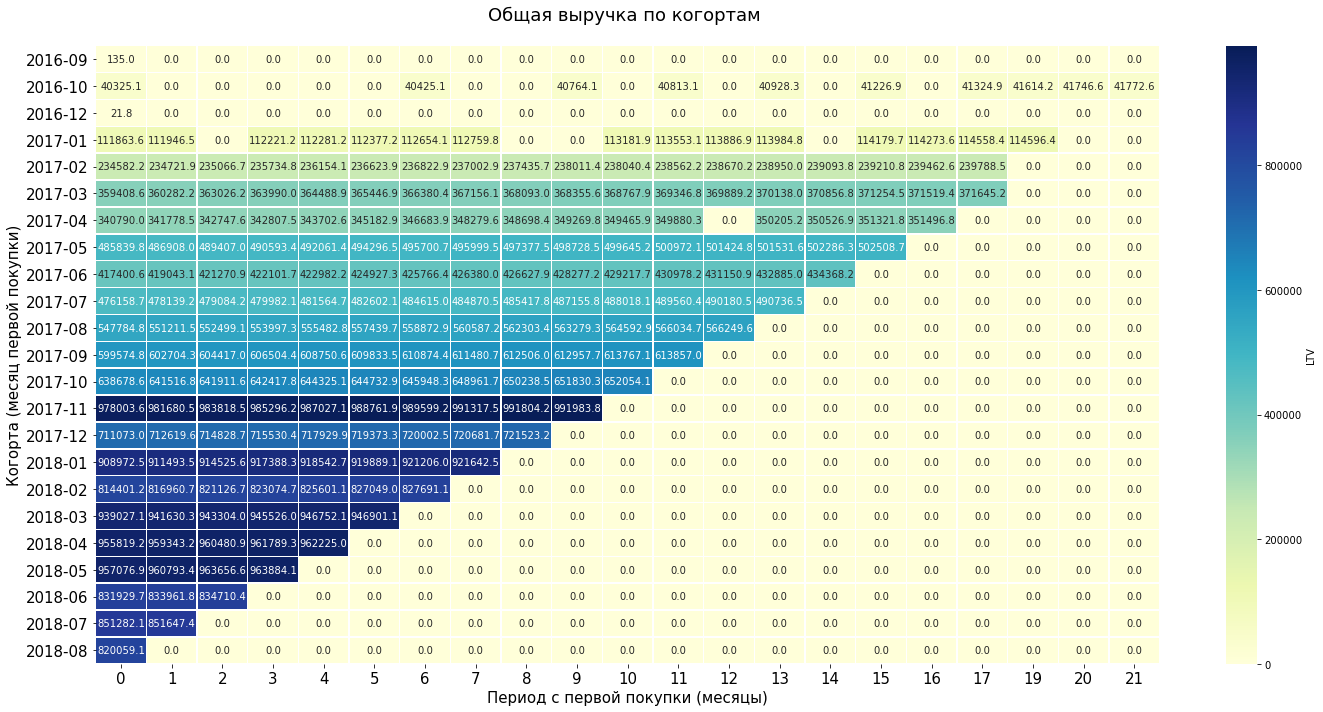

In [218]:
# 7. Визуализация
plt.figure(figsize=(20, 10))
sns.heatmap(
    ltv,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'LTV'}
)
plt.title('Общая выручка по когортам ', fontsize=18, pad=25)
plt.xlabel('Период с первой покупки (месяцы)', fontsize=15)
plt.ylabel('Когорта (месяц первой покупки)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=0)
plt.tight_layout()
plt.show()

## Задача 4.  
_Выбрать одну из 3 основных гипотез с помощью фреймворка ICE._

# Гипотеза 1

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.  

Посчитаем количество отмененных заказов.

In [33]:
# объединяем данные, чтобы использовать уникальный идентификатор пользователя 
hypothesis_1 = orders_copy.merge(
    customers_copy[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
).copy()

In [34]:
#переводим в формат даты 
hypothesis_1['order_purchase_timestamp'] = pd.to_datetime(hypothesis_1['order_purchase_timestamp'])
hypothesis_1['order_approved_at'] = pd.to_datetime(hypothesis_1['order_approved_at'])
hypothesis_1['order_delivered_carrier_date'] = pd.to_datetime(hypothesis_1['order_delivered_carrier_date'])
hypothesis_1['order_delivered_customer_date'] = pd.to_datetime(hypothesis_1['order_delivered_customer_date'])
hypothesis_1['order_estimated_delivery_date'] = pd.to_datetime(hypothesis_1['order_estimated_delivery_date'])


In [35]:
orders_filtered_hypothesis_1 =hypothesis_1[orders['order_purchase_timestamp'] >= '2017-06-01']

In [36]:
orders_filtered_hypothesis_1

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07,c716cf2b5b86fb24257cffe9e7969df8
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c


In [37]:
total_orders_hypothesis_1 = orders_filtered_hypothesis_1.shape[0]

In [38]:
total_orders_hypothesis_1

87746

In [39]:
problematic_orders_hypothesis_1 = orders_filtered_hypothesis_1[
    (orders_filtered_hypothesis_1['order_status'] == 'canceled') | 
    (orders_filtered_hypothesis_1['order_status'] == 'unavailable')
].shape[0]

In [40]:
problematic_orders_hypothesis_1

974

Ожидаемое количество повторных заказов: 974.
Cогласно таблице, 974 попадает в диапозон Impact со значением 5.      

In [41]:
confidence_1 = 8
ease_1 = 6
impact_1 = 5
print(f'ICE гипотезы 1: {confidence_1 * ease_1 * impact_1}.')

ICE гипотезы 1: 240.


# Гипотеза 2

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. Считаем, что мы таким образом избавимся от всех отмен.  

 Посчитаем, какое количество заказов было доставлено после установленного срока.

In [52]:
# объединяем данные, чтобы использовать уникальный идентификатор пользователя 
hypothesis_2 = orders_copy.merge(
    customers_copy[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
).copy()

In [53]:
#переводим в формат даты 
hypothesis_2['order_purchase_timestamp'] = pd.to_datetime(hypothesis_2['order_purchase_timestamp'])
hypothesis_2['order_approved_at'] = pd.to_datetime(hypothesis_2['order_approved_at'])
hypothesis_2['order_delivered_carrier_date'] = pd.to_datetime(hypothesis_2['order_delivered_carrier_date'])
hypothesis_2['order_delivered_customer_date'] = pd.to_datetime(hypothesis_2['order_delivered_customer_date'])
hypothesis_2['order_estimated_delivery_date'] = pd.to_datetime(hypothesis_2['order_estimated_delivery_date'])


In [54]:
hypothesis_2_delayed_orders = hypothesis_2[hypothesis_2['order_status']  == 'delivered']

In [55]:
hypothesis_2_delayed_orders =hypothesis_2_delayed_orders [hypothesis_2_delayed_orders ['order_purchase_timestamp'] >= '2017-06-01']

In [56]:
# Расчет доли заказов с задержкой
hypothesis_2_delayed_orders = hypothesis_2_delayed_orders[
   hypothesis_2_delayed_orders['order_delivered_customer_date'] > 
  hypothesis_2_delayed_orders['order_estimated_delivery_date']
]
delayed_rate = hypothesis_2_delayed_orders.shape[0] 

In [57]:
delayed_rate

7295

Конверсия в повторный заказ равна величине медианного retention 1-го месяца: 0.0035.

In [58]:
 increase_users = round(delayed_rate * 0.0035)
print(f'Ожидаемое количество повторных заказов: {increase_users}.')

Ожидаемое количество повторных заказов: 26.


In [ ]:
Cогласно таблице, 26 попадает в диапозон Impact со значением 1.

In [59]:
 confidence_2 = 10
ease_2 = 4
impact_2 = 1
print(f"ICE гипотезы 2: {confidence_2 * ease_2 * impact_2}")

ICE гипотезы 2: 40


# Гипотеза 3

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.  

Чтобы понять, насколько это может быть эффективно, посчитаем, сколько клиентов сделали только один заказ. В качестве конверсии в повторный заказ снова примем показатель 0,0035.

In [70]:
# объединяем данные, чтобы использовать уникальный идентификатор пользователя 
hypothesis_3 = orders_copy.merge(
    customers_copy[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
).copy()

In [71]:
#переводим в формат даты 
hypothesis_3['order_purchase_timestamp'] = pd.to_datetime(hypothesis_3['order_purchase_timestamp'])
hypothesis_3['order_approved_at'] = pd.to_datetime(hypothesis_3['order_approved_at'])
hypothesis_3['order_delivered_carrier_date'] = pd.to_datetime(hypothesis_3['order_delivered_carrier_date'])
hypothesis_3['order_delivered_customer_date'] = pd.to_datetime(hypothesis_3['order_delivered_customer_date'])
hypothesis_3['order_estimated_delivery_date'] = pd.to_datetime(hypothesis_3['order_estimated_delivery_date'])


In [72]:
hypothesis_3= hypothesis_3[hypothesis_3['order_status']  == 'delivered']

In [80]:
hypothesis_3

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c


In [87]:
# Расчет количества покупок на клиента
customer_orders_hypothesis_3 = hypothesis_3.groupby('customer_unique_id').size()

In [89]:
customer_orders_hypothesis_3.info()

<class 'pandas.core.series.Series'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Series name: None
Non-Null Count  Dtype
--------------  -----
93358 non-null  int64
dtypes: int64(1)
memory usage: 3.4+ MB


In [90]:
# Определение клиентов с повторными покупками

single_purchase_hypothesis_3 = customer_orders_hypothesis_3[customer_orders_hypothesis_3 == 1].count()
repeat_purchase_hypothesis_3 = customer_orders_hypothesis_3[customer_orders_hypothesis_3 > 1].count()
total_customers_hypothesis_3 = customer_orders_hypothesis_3.count()

print(f"Клиенты с одной покупкой: {single_purchase_hypothesis_3}")
print(f"Клиенты с повторными покупками: {repeat_purchase_hypothesis_3}")
print(f"Общее количество покупателей: {total_customers_hypothesis_3}")


Клиенты с одной покупкой: 90557
Клиенты с повторными покупками: 2801
Общее количество покупателей: 93358


In [92]:

payment_count = round(single_purchase_hypothesis_3 * 0.0035)
print(f'Ожидаемое количество повторных заказов: {payment_count}.')

Ожидаемое количество повторных заказов: 317.


Cогласно таблице, 285 попадает в диапозон Impact со значением 3.

Соберем все гипотезы в один датафрейм и построим график для сравнения ICE.
-

In [94]:
hypotheses = pd.DataFrame({
    'hypothesis': ['Гипотеза 1', 'Гипотеза 2', 'Гипотеза 3'],
    'ICE': [240, 40, 135],
    'expected_orders': [problematic_orders_hypothesis_1, increase_users, payment_count]
})

hypotheses

,hypothesis,ICE,expected_orders
0,Гипотеза 1,240,974
1,Гипотеза 2,40,26
2,Гипотеза 3,135,317


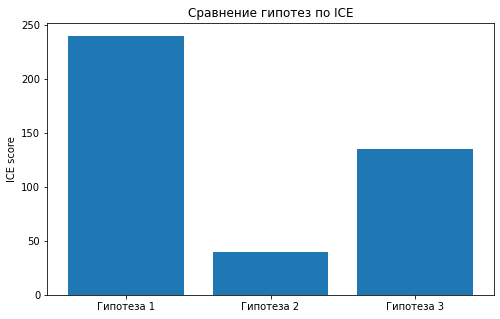

In [95]:
plt.figure(figsize=(8, 5))
plt.bar(hypotheses['hypothesis'], hypotheses['ICE'])
plt.title('Сравнение гипотез по ICE')
plt.ylabel('ICE score')
plt.show()

 Реализуем гипотезу №1 (исправление бага), получившую наивысший приоритет в 240 баллов. Это решение улучшит пользовательский опыт и повысит удовлетворенность клиентов маркетплейса.

## Задача 5.
_Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять._

После предыдущего исследования у нас появилась гипотеза, которую можно реализовать для значительного улучшения метрик компании. Было предложено использовать A/B-тестирование для проверки её эффективности.  

Сформулируем метрики, на которые должна повлиять выбранная гипотеза. Необходимо сформулировать хотя бы по одной метрике в категории: целевые, прокси, guardrail и объяснить свой выбор.   


1. Целевая метрика: конверсия в доставленные заказы (доставленные заказы / созданные заказы). Именно доставленные заказы генерируют выручку. Можно отслеживать в реальном времени по необходимым периодам. Если гипотеза верна, то эта метрика должна вырасти.  

2. Прокси-метрика: Успешность платежей (успешные платежи / все попытки оплаты). Улучшение данной метрики проявится раньше, чем рост целевой метрики. Прямо подтверждает исправление бага в платежной системе.  

3. Guardrail-метрики: Коэффициент жалоб - количество обращений в поддержку. Не сломали ли мы что-то важное, пока улучшали основную метрику?

## Выводы  


 Ключевая проблема продукта — низкое удержание пользователей. Большинство клиентов совершают одну покупку и покидают маркетплейс, не формируя повторного спроса.  
 
 Проведён когортный анализ, который показал практически полное отсутствие повторных покупок после 1-го месяца. Несмотря на постоянный приток новых пользователей, выручка не растёт, а лишь поддерживается за счёт нового трафика. Был зафиксирован высокий процент отменённых заказов — 974 отмены с июня 2017 года. Анализ пользовательского пути показал, что технические проблемы в процессинге заказов напрямую влияют на конверсию и удержание.  
 
 Маркетплейс успешно решает задачу привлечения пользователей, но не удерживает их. Отсутствует Product/Market Fit, продукт не закрывает повторные потребности пользователей. Технические проблемы напрямую снижают доверие к сервису, увеличивают количество отмен заказов и негативно влияют на пользовательский опыт. Дальнейшее масштабирование привлечения без решения проблем retention неэффективно. Необходимо сместить фокус с привлечения новых пользователей на удержание существующих.  
 
 Чтобы увеличить метрики, необходимо исправление технического бага в системе процессинга заказов. Это снизит количество отменённых заказов, увеличит долю успешно доставленных заказов, а также улучшит пользовательский опыт и доверие к сервису.  
 
 После исправления бага необходимо провести A/B-тестирование, чтобы подтвердить эффект изменений. Ожидаемые результаты: рост конверсии пользователей, увеличение доли доставленных заказов, снижение доли отменённых заказов.  
 
 Без решения проблем с качеством пользовательского опыта и удержанием дальнейший рост маркетплейса невозможен, независимо от объёма привлечения новых пользователей.